In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt,timedelta as td
from calendar import monthrange as mrng
%matplotlib inline

A continuacion veremos la cantidad de preguntas en StackExchange con tags o titulos que incluyan Haskell, basados en el sistema de [Query](https://data.stackexchange.com/stackoverflow/query/edit/740338#resultSets)

In [50]:
rddSE = spark.read.option("header","false").csv("./QueryResults.csv").rdd
rddSE = rddSE.map(lambda x: (dt.strptime(x[0],"%Y-%m-%d %H:%M:%S"),x[1]))
rddSE = rddSE.map(lambda x: ((x[0].year,x[0].month),int(x[1])))
rddSE = rddSE.reduceByKey(lambda x,y: x+y)
rddSE = rddSE.map(lambda x: (x[0][0],x[0][1],x[1]))
rddSE = rddSE.map(lambda x: (dt(year=x[0],month=x[1],day=mrng(x[0],x[1])[1]),x[2]))
dfSE = rddSE.toDF(['fecha','cant']).toPandas().sort_values(by=['fecha'])

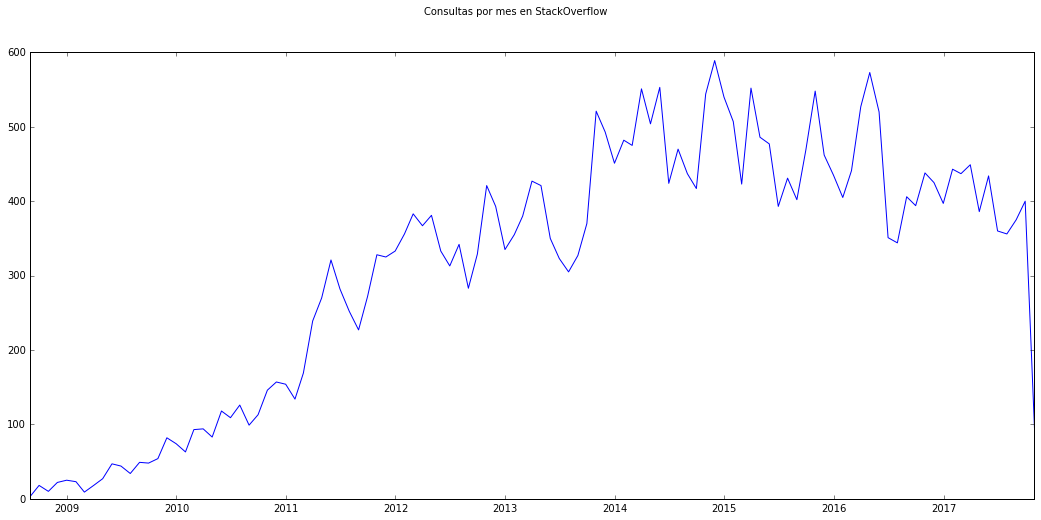

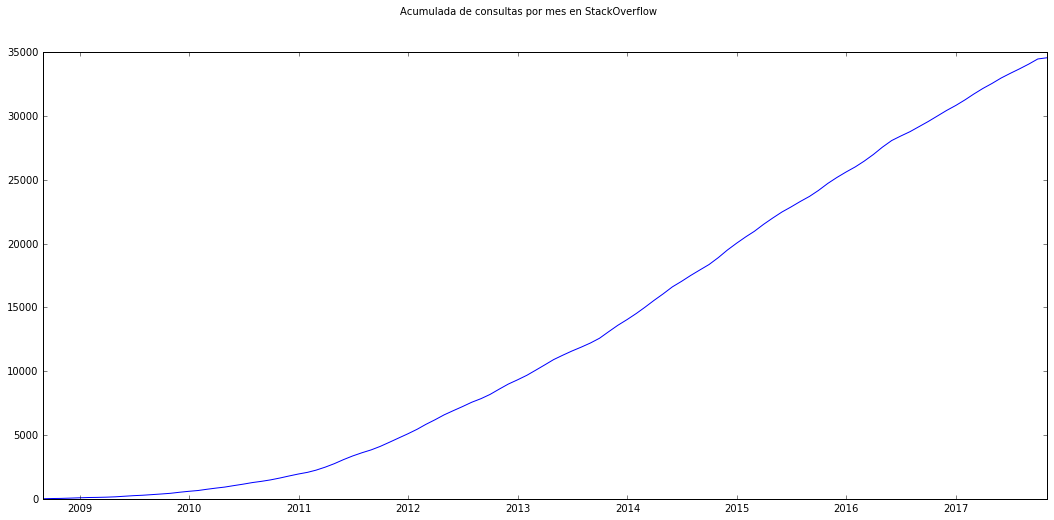

In [71]:
fig = plt.figure(figsize=(18,8))
fig.suptitle("Consultas por mes en StackOverflow")
plt.plot(dfSE.fecha,dfSE.cant)

fig = plt.figure(figsize=(18,8))
fig.suptitle("Acumulada de consultas por mes en StackOverflow")
plt.plot(dfSE.fecha,np.cumsum(dfSE.cant))

plt.show()

In [65]:
rddGH = spark.read.option("header","false").csv("./repos_por_dia.csv").rdd
rddGH = rddGH.map(lambda x: (dt.strptime(x[0],"%Y-%m-%d"),x[1]))
rddGH = rddGH.map(lambda x: ((x[0].year,x[0].month),int(x[1])))
rddGH = rddGH.reduceByKey(lambda x,y: x+y)
rddGH = rddGH.map(lambda x: (x[0][0],x[0][1],x[1]))
rddGH = rddGH.map(lambda x: (dt(year=x[0],month=x[1],day=mrng(x[0],x[1])[1]),x[2]))
dfGH = rddGH.toDF(['fecha','cant']).toPandas().sort_values(by=['fecha'])


rddGHt = spark.read.option("header","false").csv("./repos_totales_por_dia.csv").rdd
rddGHt = rddGHt.map(lambda x: (dt.strptime(x[0],"%Y-%m-%d"),x[1]))
rddGHt = rddGHt.map(lambda x: ((x[0].year,x[0].month),int(x[1])))
rddGHt = rddGHt.reduceByKey(lambda x,y: x+y)
rddGHt = rddGHt.map(lambda x: (x[0][0],x[0][1],x[1]))
rddGHt = rddGHt.map(lambda x: (dt(year=x[0],month=x[1],day=mrng(x[0],x[1])[1]),x[2]))
dfGHt = rddGHt.toDF(['fecha','cant']).toPandas().sort_values(by=['fecha'])

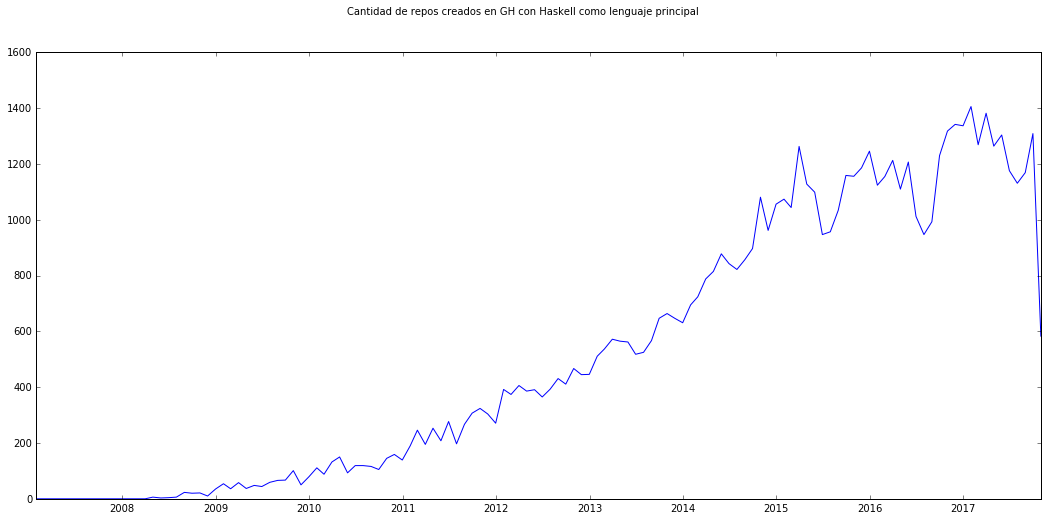

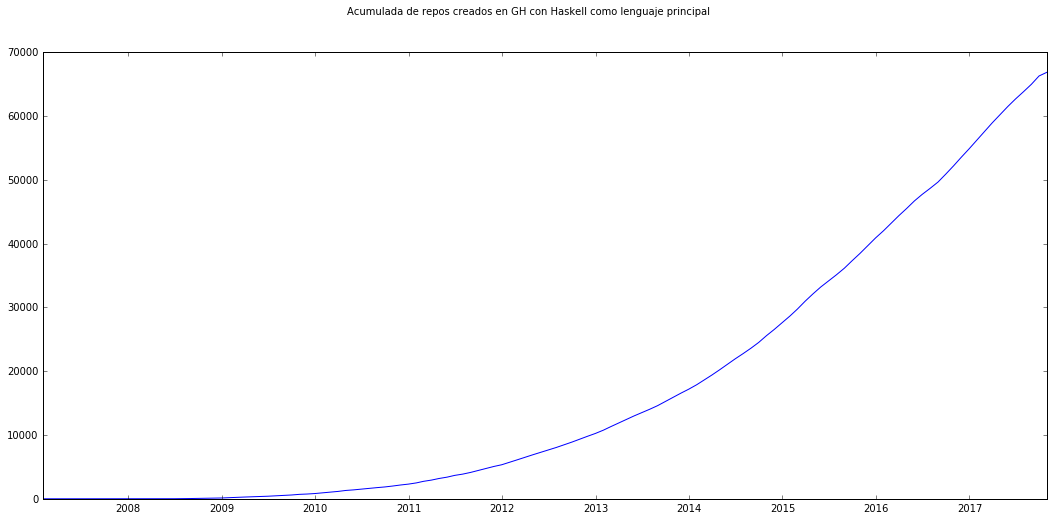

In [73]:
fig = plt.figure(figsize=(18,8))
fig.suptitle("Cantidad de repos creados en GH con Haskell como lenguaje principal")
plt.plot(dfGH.fecha,dfGH.cant)

fig = plt.figure(figsize=(18,8))
fig.suptitle("Acumulada de repos creados en GH con Haskell como lenguaje principal")
plt.plot(dfGH.fecha,np.cumsum(dfGH.cant))

plt.show()